https://mlabonne.github.io/blog/reinforcement%20learning/q-learning/frozen%20lake/gym/tutorial/2022/02/13/Q_learning.html

In [1]:
# !pip install pygame 
import pygame

pygame 2.1.3 (SDL 2.0.22, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# !pip install -q gym
# !pip install -q matplotlib
import gym
import random
import numpy as np
import matplotlib.pyplot as plt

<h1>#Non-Slippely</h1>

In [3]:

env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False, render_mode="rgb_array")
env.reset()
env.render()

array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]

In [82]:
#Creating Q table
# Alternatively, the gym library can also directly g
# give us the number of states and actions using 
# "env.observation_space.n" and "env.action_space.n"
nb_states = env.observation_space.n
nb_actions = env.action_space.n
qtable = np.zeros((nb_states, nb_actions))

print("Qtable = ")
print(qtable)

Qtable = 
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [83]:
#select action randomly
#like this random.choice(["Left", "Right", "Up", "Down"]) but it has built in method
# ◀️ LEFT = 0
# 🔽 DOWN = 1
# ▶️ RIGHT = 2
# 🔼 UP = 3
env.action_space.sample()


1

In [84]:
#this is basic way to move agent to a new state
env.step(2)
env.render()

In [85]:
# Implement a action and move the agent in the desired direction
action = env.action_space.sample()
#There are 5 returns from step() observation, reward, terminated, truncated, info - from official document
new_state, reward, done, truncated, info = env.step(action)

#display the result(reward and map)
env.render()
print(f'Reward = {reward}')

Reward = 0.0


So training our agent in code means:


1. <b>Choosing a random action</b> (using action_space.sample()) if the values in the current state are just zeros. Otherwise,we take the action with the highest value in the current state with the function np.argmax();

2. <b>Implementing this action</b> by moving in the desired direction with step(action);

3. <b>Updating the value</b> of the original state with the action we took, using informa\tion about the new state and the reward \given by step(action);\

We keep repeating these 3 steps until the agent <b>gets stuck in a hole</b> or <b>reaches the goal G</b>. When it happens, we just <b>restart the environment</b> with reset() and start a new episode until we hit 1,000 episodes. Additionally, we can plot the <b>outcome of each run</b> (failure if it didn't reach the goal, success otherwise) to <b>observe the progress</b> of our agent.

In [86]:
env.reset()

(0, {'prob': 1})

In [5]:

plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 17})

# We re-initialize the Q-table
qtable = np.zeros((env.observation_space.n, env.action_space.n))

# Hyperparameters
episodes = 1000     # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor

# List of outcomes to plot
outcomes = []

print('Q-table before training:')
print(qtable)



Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [6]:
#Training 
for _ in range(episodes):
    state, info = env.reset()
    done = False
    
    # By default, we consider our outcome to be a failure
    outcomes.append('Failure')
    
    
    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        if np.max(qtable[state]) > 0:
            #np.argmax return
            action = np.argmax(qtable[state])
            
        # If there's no best action (only zeros), take a random one
        else: 
            action = env.action_space.sample()
        
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, truncated, info = env.step(action)
        
        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                 alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
        # Update our current state
        state = new_state
        
        # If we have a reward, it means that our outcome is a success
        if reward:
            outcomes[-1] = "Success"
        
print()
print('===========================================')
print('Q-table after training:')
print(qtable)


Q-table after training:
[[0.      0.59049 0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.6561  0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.729   0.     ]
 [0.      0.      0.81    0.     ]
 [0.      0.9     0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      1.      0.     ]
 [0.      0.      0.      0.     ]]


Q-table after training:
[[0.      0.      0.59049 0.     ]
 [0.      0.      0.6561  0.     ]
 [0.      0.729   0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.81    0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.9     0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      1.      0.     ]
 [0.      0.      0.      0.     ]]


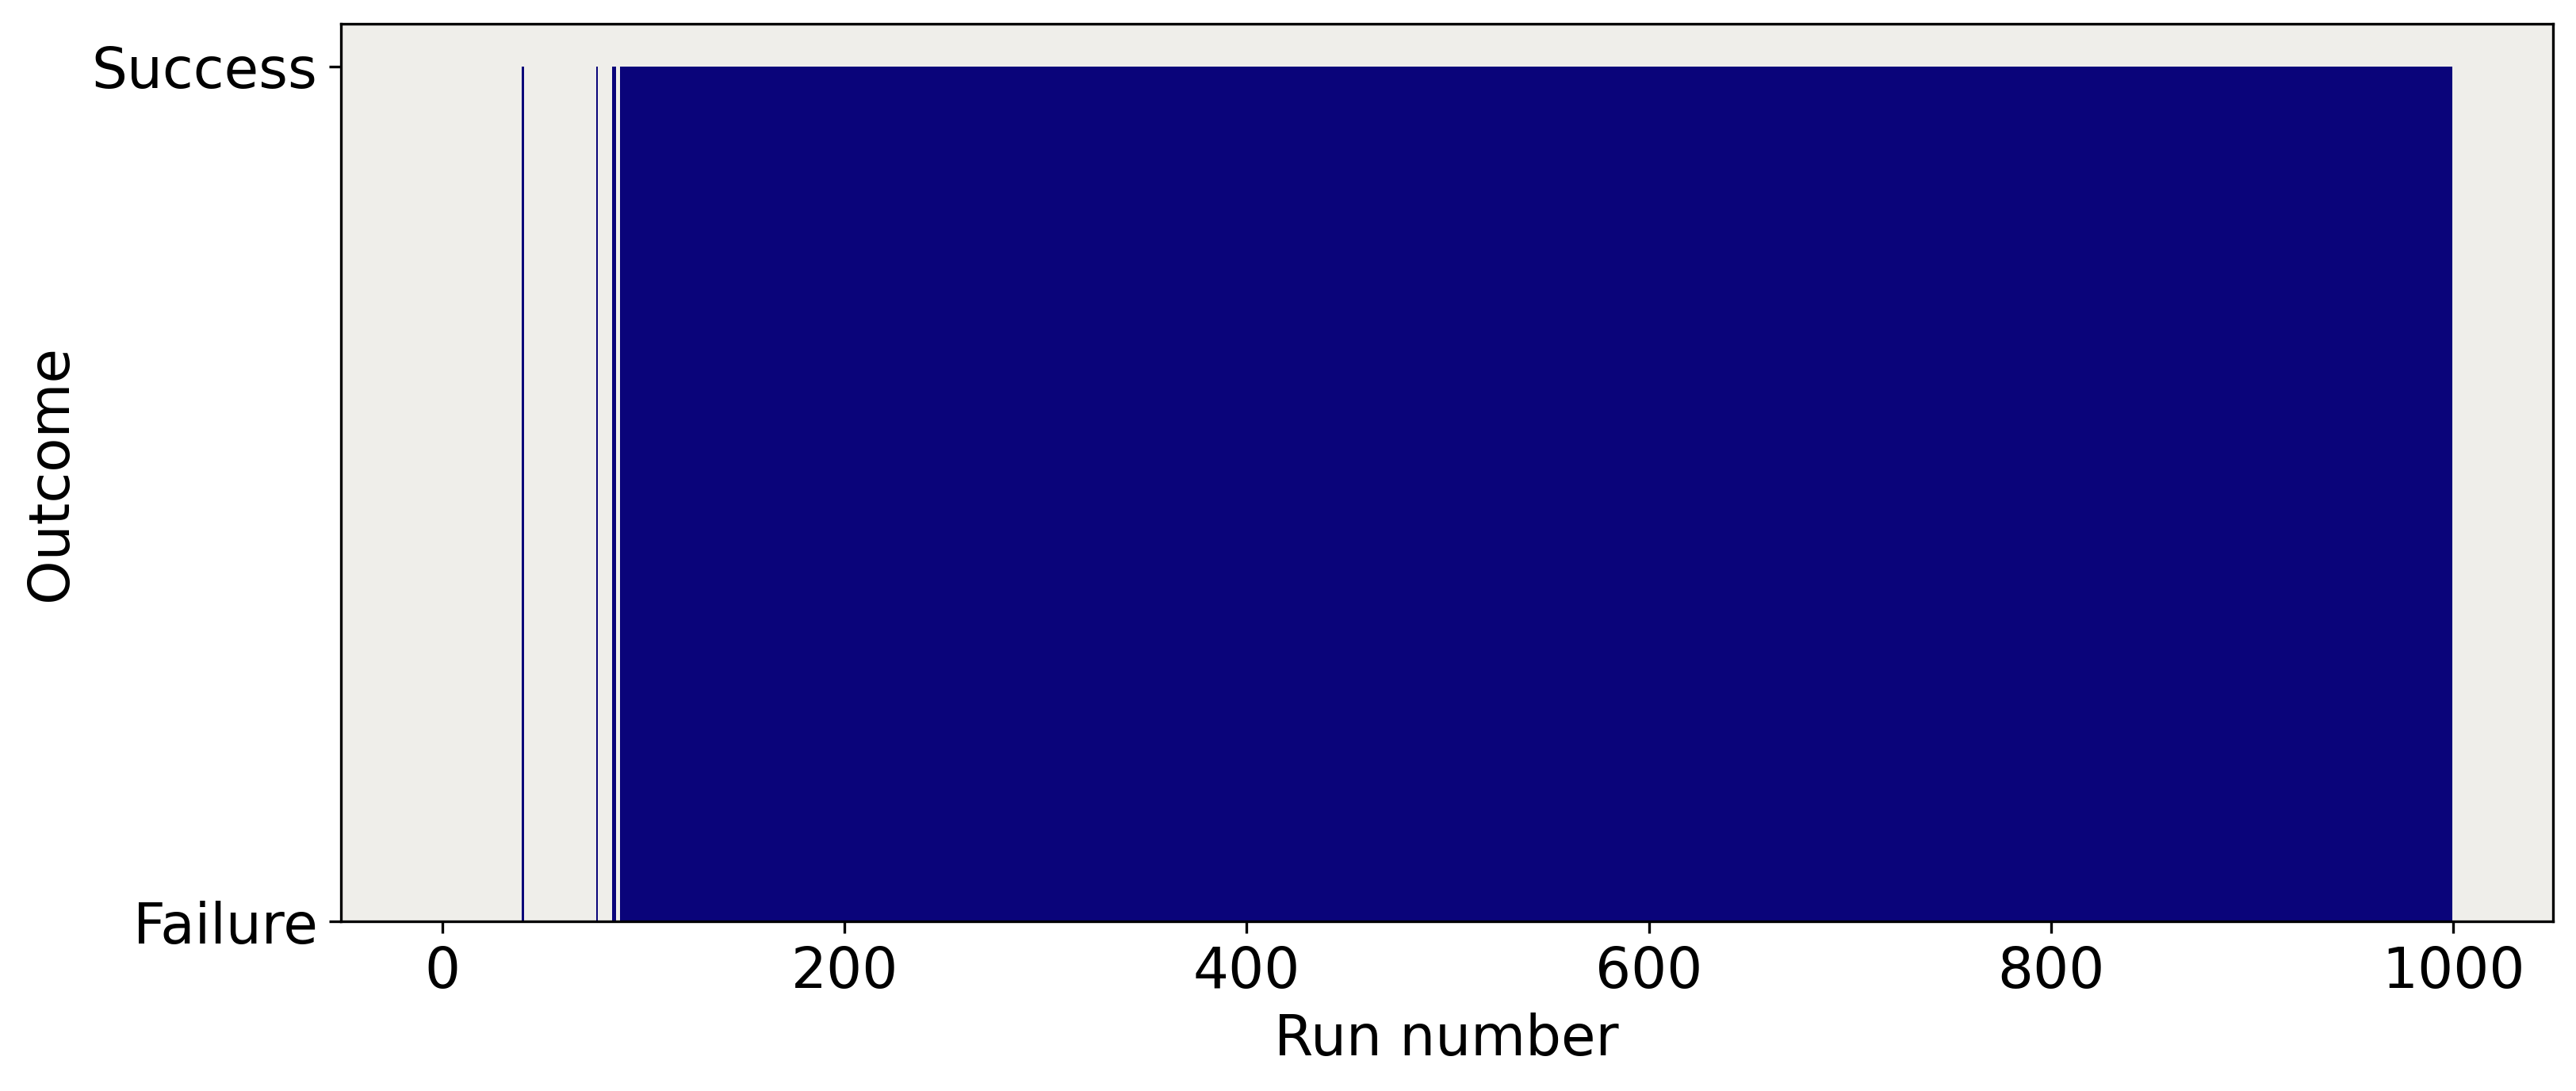

In [7]:
print('===========================================')
print('Q-table after training:')
print(qtable)
# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()

The agent is trained! Each blue bar on the figure corresponds to a win, so we can see that the agent had a hard time finding the goal at the beginning of the training. But once it found it several times in a row, it began to consistently win. 🥳 The trained Q-table is also very interesting: these values indicate the unique sequence of actions the agent learned to reach the goal.

In [112]:
#Now let's see how it performs by evaluating it on 100 episodes. 
#We consider that the training is over, so we don't need to update the Q-table anymore. 
#To see how the agent performs, we can calculate the percentage of times the it managed to reach the goal 
#(success rate).

episodes = 100
nb_success = 0

# Evaluation
for _ in range(100):
    state, info = env.reset()
    done = False
    
    # Until the agent gets stuck or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        if np.max(qtable[state]) > 0:
            action = np.argmax(qtable[state])

        # If there's no best action (only zeros), take a random one
        else:
            action = environment.action_space.sample()
             
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, truncated, info = env.step(action)

        # Update our current state
        state = new_state

        # When we get a reward, it means we solved the game
        nb_success += reward

# Let's check our success rate!
print (f"Success rate = {nb_success/episodes*100}%")

Success rate = 100.0%


In [115]:
from IPython.display import clear_output
import time 

state, info = env.reset()
done = False
sequence = []

while not done:
    # Choose the action with the highest value in the current state
    if np.max(qtable[state]) > 0:
        action = np.argmax(qtable[state])

    # If there's no best action (only zeros), take a random one
    else:
        action = environment.action_space.sample()
    
    # Add the action to the sequence
    sequence.append(action)

    # Implement this action and move the agent in the desired direction
    new_state, reward, done, truncated, info = env.step(action)

    # Update our current state
    state = new_state

    # Update the render
    clear_output(wait=True)
    environment.render()
    time.sleep(1)

print(f"Sequence = {sequence}")

Sequence = [2, 2, 1, 1, 1, 2]


<h1>Epsilon-Greedy Algorithm</h1>

A tradeoff between these two behaviors is important: if the agent only focuses on exploitation, it cannot try new solutions and thus doesn't learn anymore. On the other hand, if the agent only takes random actions, the training is pointless

1. Take the action with the highest value (exploitation);
2. Choose a random action to try to find even better ones (exploration).

This technique is commonly called the epsilon-greedy algorithm, where epsilon is our parameter. It is a simple but extremely efficient method to find a good tradeoff. Every time the agent has to take an action, it has a probability 
ε of choosing a random one, and a probability
1−ε of choosing the one with the highest value. We can decrease the value of epsilon at the end of each episode by a fixed amount (linear decay), or based on the current value of epsilon (exponential decay).

Let's implement a linear decay. Beforehand, I'd like to see how the curve looks like with arbitrary parameters. We'll start with ε=1 to be in full exploration mode, and decrease this value by
0.001 after each episode.

In [11]:
qtable  =  np.zeros((env.observation_space.n, env.action_space.n))

#Hyperparameters
episodes = 1000     #Total number of wpisodes
alpha = 0.5         #Learning Rate
gamma = 0.8         #Discount Factor
epsilon = 1.0       #Amount of randomness in the action seciton
epsilon_decay=0.001 #Fixed amount to decrease

#List of outcome to plot
outcomes = []

print('Q-table before training:')
print(qtable)
print('-------------------------')

#Training 

for _ in range(episodes):
    state, info = env.reset()
    done = False
    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")
    
    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        #generate rondom num between 0-1
        rnd = np.random.random()
        
        #if random number is < epsilon take random action (Exploitation)
        if rnd < epsilon:
            action = env.action_space.sample()
        #Else, take action with the highest value (Exploration)
        else:
            action = np.argmax(qtable[state])
        
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, truncated, info = env.step(action)
        
        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        # Update our current state
        state = new_state

        # If we have a reward, it means that our outcome is a success
        if reward:
            outcomes[-1] = "Success"
            
    # Update epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

    
print()
print('===========================================')
print('Q-table after training:')
print(qtable)
        


Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
-------------------------

Q-table after training:
[[0.262144   0.32768    0.32768    0.262144  ]
 [0.26214397 0.         0.4096     0.32767966]
 [0.32768    0.512      0.32767018 0.40959998]
 [0.40959818 0.         0.31801811 0.3213683 ]
 [0.32768    0.4096     0.         0.262144  ]
 [0.         0.         0.         0.        ]
 [0.         0.64       0.         0.40959998]
 [0.         0.         0.         0.        ]
 [0.4096     0.         0.512      0.32768   ]
 [0.4096     0.64       0.64       0.        ]
 [0.512      0.8        0.         0.512     ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.63999984 0.8        0.51194697]
 [0.64       0.8        1

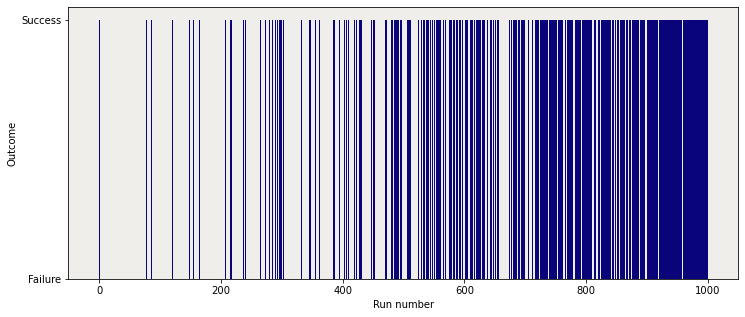

In [15]:
##Plot the outcome 
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()


Hey, the agent takes more time to consistently win the game now! And the Q-table has a lot more non-zero values than the previous one, which means the agent has learned several sequences of actions to reach the goal. It is understandable, since this new agent is forced to explore state-action pairs instead of always exploiting ones with non-zero values.



Let's see if it's as successful as the previous one to win the game. In evaluation mode, we don't want exploration anymore because the agent is trained now.

In [20]:
episodes = 100
nb_success = 0

#Evaluation
for _ in range(100):
    state, info = env.reset()
    done = False
    
    #while agent get stuck or reaches the goal, keep training it
    while not done:
        # choose the action with the highesgt value in the current state
        action = np.argmax(qtable[state])
        
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, truncated, info = env.step(action)

        #Update our current state
        state = new_state
        
        # When we get a reward, it means we solved the game
        nb_success += reward
        
print (f"Success rate = {nb_success/episodes*100}%")


Success rate = 100.0%


The benefits of this approach might not be obvious in this example, but our model became less static and more flexible. It learned different paths (sequences of actions) from S to G instead of just one as in the previous approach. More exploration can degrade performance but it's necessary to train agents that can adapt to new environments.

<h1>#Slippery Frozen Lake</h1>

In the slippery variant, the action the agent takes only has 33% chance of succeeding. In case of failure, one of the three other actions is randomly taken instead. This feature adds a lot of randomness to the training, which makes things more difficult for our agent. Let's see how well our code is doing in this new environment...

In [13]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)
env.reset()

#reinitialize the Qtable 
qtable = np.zeros((env.observation_space.n, env.action_space.n))

# Hyperparameters
episodes = 1000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor
epsilon = 1.0          # Amount of randomness in the action selection
epsilon_decay = 0.001  # Fixed amount to decrease

# List of outcomes to plot
outcomes = []

print('Q-table before training:')
print(qtable)

#Training 

for _ in range(episodes):
    state, info = env.reset()
    done = False
    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")
    
    while not done:
        #generate random number between 0-1
        rnd = np.random.random()
        
        #if random number < epsilon, take a random action
        if rnd < epsilon:
            action = env.action_space.sample()
        # Else, take the action with the highest value in the current state
        else:
            action = np.argmax((qtable[state]))
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, truncated, info = env.step(action)
        
        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
        # Update our current state
        state = new_state
        
        # If we have a reward, it means that our outcome is a success
        if reward:
            outcomes[-1] = "Success"
            
    # Update epsilon
    epsilon = max(epsilon - epsilon_decay, 0)
    
    
print()
print('===========================================')
print('Q-table after training:')
print(qtable)
        

Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training:
[[0.08472005 0.04227696 0.0415911  0.04420149]
 [0.03089755 0.02863352 0.0239061  0.04192936]
 [0.03456569 0.08447169 0.0387236  0.04260485]
 [0.01679018 0.02279749 0.02681595 0.04094686]
 [0.22198991 0.08213474 0.05246084 0.08352144]
 [0.         0.         0.         0.        ]
 [0.0168255  0.0155946  0.0639572  0.01605058]
 [0.         0.         0.         0.        ]
 [0.12216417 0.14175582 0.12081758 0.3320802 ]
 [0.09418942 0.43042904 0.10844014 0.15159832]
 [0.33040693 0.09139516 0.0882435  0.16206606]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.20047368 0.12907153 0.35846862 0.27194346]
 [0.3305842  0.83880828 0.28904772 0.382462  ]
 [0.

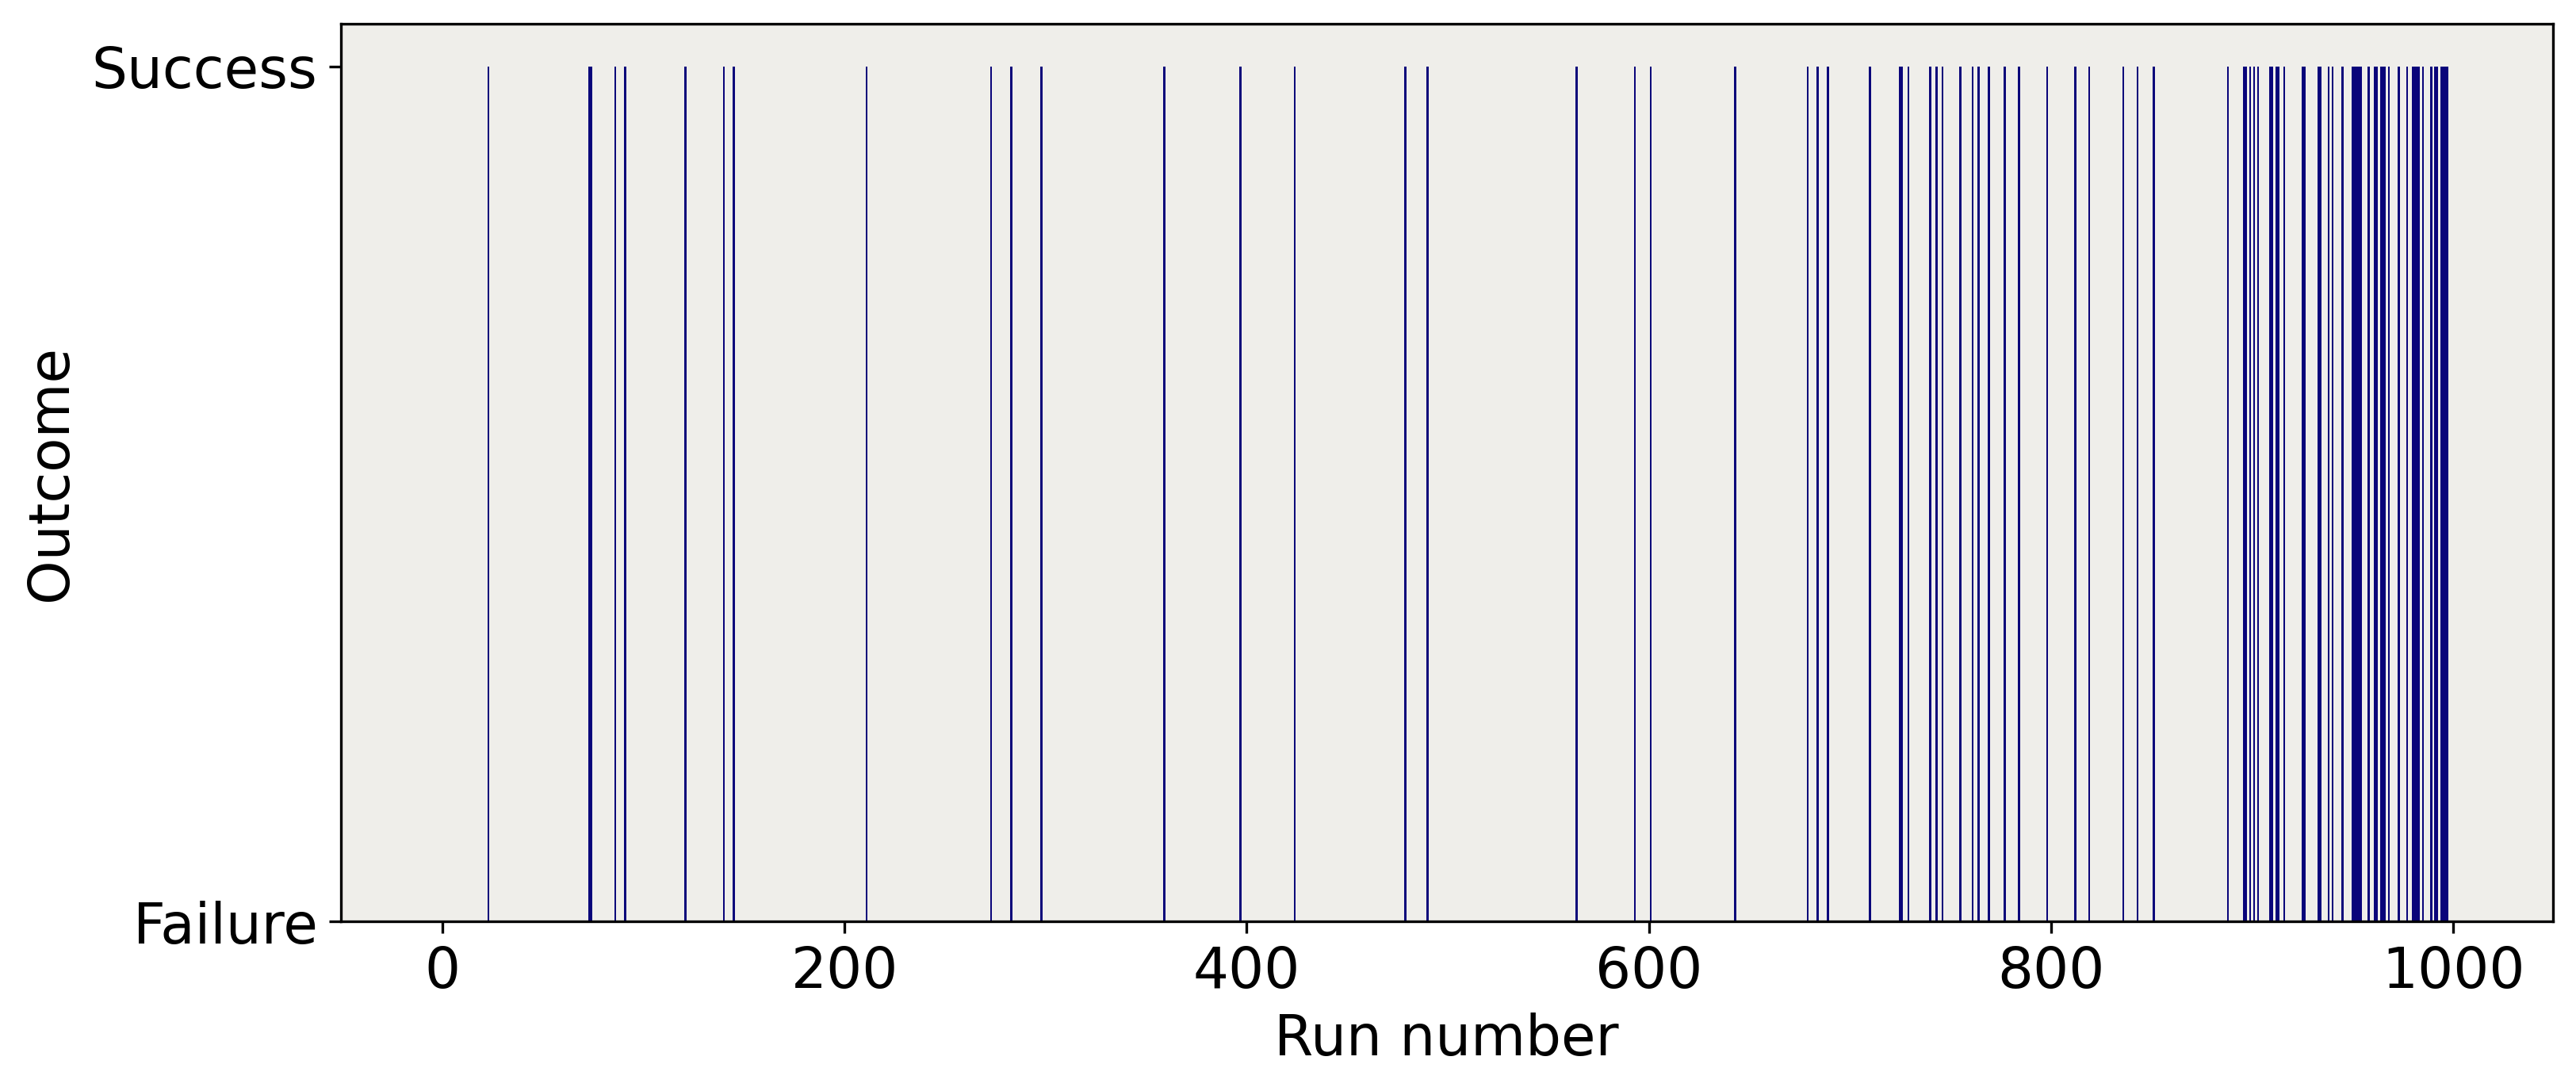

Success rate = 79.0%


In [17]:
#Plot the outcome
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()
print (f"Success rate = {nb_success/episodes*100}%")


In [16]:
##Evaluation

episodes = 100
nb_success = 0

for _ in range(100):
    state, info = env.reset()
    done = False
    
    while not done:
        # Choose the action with the highest value in the current state
        action = np.argmax(qtable[state])

        # Implement this action and move the agent in the desired direction
        new_state, reward, done, truncated,  info = env.step(action)

        # Update our current state
        state = new_state

        # When we get a reward, it means we solved the game
        nb_success += reward


print (f"Success rate = {nb_success/episodes*100}%")


None
Success rate = 79.0%
